In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import Capital Bike Share DataFrames
df_st = pd.read_csv('station_info.csv')
df_wk = pd.read_csv('last_week.csv')

In [5]:
df_st.head()

,Unnamed: 0,Name,Capacity
0,0,Eads St & 15th St S,15
1,1,18th St & S Eads St,11
2,2,Crystal Dr & 20th St S,17
3,3,Crystal Dr & 15th St S,16
4,4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,12


In [ ]:
df_st.shape

In [22]:
df_st[(df_st['Name']=='Lincoln Memorial')]

,Unnamed: 0,Name,Capacity
195,195,Lincoln Memorial,25


In [ ]:
df_wk[df_wk['start_station_name']=='Lincoln Memorial'].count()

In [ ]:
df_wk.dtypes

In [13]:
df_wk['day'].str.replace("-","").astype(int)

0        20210625
1        20210622
2        20210622
3        20210626
4        20210622
           ...   
57929    20210623
57930    20210625
57931    20210625
57932    20210625
57933    20210621
Name: day, Length: 57934, dtype: int64

In [41]:
df_wk.day = pd.to_datetime(df_wk.day)
df_wk.loc[:,'DAY'] = df_wk.day.dt.day
df_wk.loc[:,'weekday'] = df_wk.day.dt.day_name()
df_wk.loc[:,'month'] = df_wk.day.dt.month_name()
df_wk.loc[:,'yr'] = df_wk.day.dt.year

In [25]:
df_wk.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,DAY,weekday,month,yr
0,B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,-76.988422,casual,2021-06-25,25,Friday,June,2021
1,6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,-77.230681,casual,2021-06-22,22,Tuesday,June,2021
2,7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,-77.035421,member,2021-06-22,22,Tuesday,June,2021
3,18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,2021-06-26,26,Saturday,June,2021
4,294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,-77.038359,member,2021-06-22,22,Tuesday,June,2021


In [ ]:
df_wk[df_wk['weekday']=='Friday'].count()

In [47]:
df_wk[(df_wk['start_station_name']=='Lincoln Memorial') & (df_wk['day']=='2021-06-25') ].count()['ride_id']

142

In [50]:
count_wk= pd.DataFrame(df_wk.groupby(['start_station_name']).count()['ride_id'])
count_wk

,ride_id
start_station_name,
10th & E St NW,183
10th & Florida Ave NW,247
10th & G St NW,116
10th & K St NW,257
10th & Monroe St NE,54
...,...
Wisconsin Ave & O St NW,164
Woodglen Dr & Executive Blvd,15
Woodley Park Metro / Calvert St & Connecticut Ave NW,207


<AxesSubplot:>

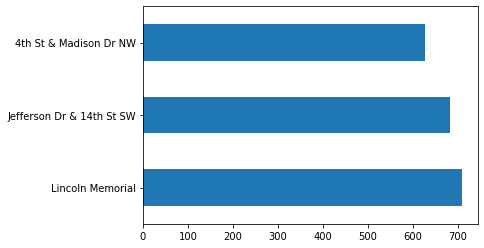

In [46]:
df_wk['start_station_name'].value_counts()[:3].plot(kind='barh')

In [33]:
df_wk.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'day', 'DAY', 'weekday', 'month', 'yr'],
      dtype='object')

<AxesSubplot:>

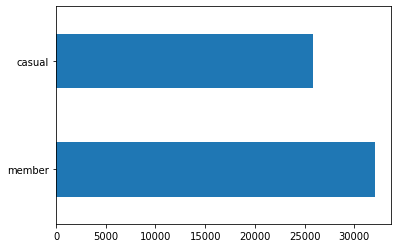

In [49]:
df_wk['member_casual'].value_counts().plot(kind='barh')

In [ ]:
daily = (df_wk['started_at'].resample('m').sum()).plot(figsize = (15,5))

In [ ]:
by_weekday = (df_wk['started_at'].resample('m').sum()).plot(figsize = (15,5))